# ROM File Parser Demo & Visualizer

## File Parsing

In [1]:
from rom_parser import parse_rom_data

In [3]:
with open("/home/avadakedavra/Workspace/catkin_ws/src/robot_projects/drivers/peripheral/ros_ndi_tracker/config/roms/tool.rom", 'rb') as rom_file:
	markers = parse_rom_data(rom_file.read())

# print marker data
print("Marker\t\tX (mm)\t\tY (mm)\t\tZ (mm)")
for i in range(len(markers)):
	print(f"{chr(ord('A') + i)}\t\t{markers[i][0]}\t\t{markers[i][1]}\t\t{markers[i][2]}")

Marker		X (mm)		Y (mm)		Z (mm)
A		-22.76		-21.8		-22.49
B		-15.33		27.59		-21.83
C		10.45		-40.07		18.68
D		27.63		34.27		25.64


## Visualization

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def plot_markers(ax):
    ax.set_box_aspect((1, 1, 1))
    for i in range(len(markers)):
        ax.scatter(*markers[i], marker='.', s=500, alpha=1)
        ax.text(*markers[i], chr(ord('A') + i), size=13, zorder=10,  color='k')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_box_aspect([1,1,1])
    
    limits = np.array([ax.get_xlim3d(),ax.get_ylim3d(),ax.get_zlim3d(),])
    origin = np.mean(limits, axis=1)
    radius = 0.5 * np.max(np.abs(limits[:, 1] - limits[:, 0]))
    x, y, z = origin
    ax.set_xlim3d([x - radius, x + radius])
    ax.set_ylim3d([y - radius, y + radius])
    ax.set_zlim3d([z - radius, z + radius])

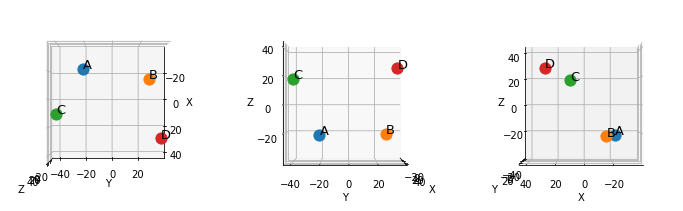

In [6]:
# Static visualization
%matplotlib inline
fig = plt.figure(figsize=(12,12))
axs = [fig.add_subplot(1, 3, i+1, projection='3d') for i in range(3)]
plot_markers(axs[0])
axs[0].view_init(elev=90, azim=0)
plot_markers(axs[1])
axs[1].view_init(elev=0, azim=0)
plot_markers(axs[2])
axs[2].view_init(elev=0, azim=90)
plt.show()

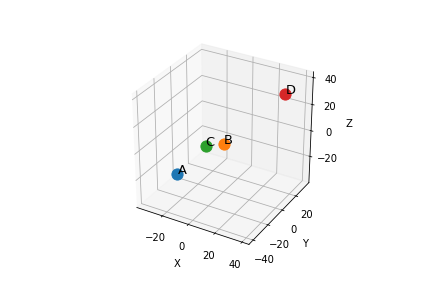

In [7]:
# Interactive visualization
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot_markers(ax)
plt.show()